## Simulated Annealing


This notebook generates the results used in the report for the third assignment of the course 'Stochastic Simulation'.

Authors:

1. Divyaben Hasmukhbhai Gajera
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: divya.gajera@student.uva.nl
- Student Number: 14932644

2. K. López
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: kenia.lopez.sotomayor@student.uva.nl
- Student Number: 12965081

3. T. P. Glansdorp
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: thomas.glansdorp@student.uva.nl
- Student Number: 12748587

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [65]:

def read_tsp_instance(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    coordinates = {}
    node_coord_section_found = False

    for line in lines:
        line = line.strip()
        
        if line.startswith("NODE_COORD_SECTION"):
            node_coord_section_found = True
        elif node_coord_section_found and not line.startswith("EOF"):
            point_data = line.split()
            point_id = int(point_data[0])
            x, y = map(float, point_data[1:])
            coordinates[point_id] = (x, y)

    return coordinates

def calculate_distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return distance

def calculate_total_distance(route, coordinates):
    total_distance = 0
    for i in range(len(route) - 1):
        city1 = coordinates[route[i]]
        city2 = coordinates[route[i + 1]]
        total_distance += calculate_distance(city1, city2)
    total_distance += calculate_distance(coordinates[route[-1]], coordinates[route[0]])  # Return to the starting city
    return total_distance

def two_opt_swap(route, i, j):
    new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
    return new_route

# def two_opt_algorithm(coordinates, initial_route):
#     current_route = initial_route
#     current_distance = calculate_total_distance(current_route, coordinates)
#     improvement_made = True

#     while improvement_made:
#         improvement_made = False
#         for i in range(len(current_route) - 1):
#             for j in range(i + 1, len(current_route)):
#                 new_route = two_opt_swap(current_route, i, j)
#                 new_distance = calculate_total_distance(new_route, coordinates)

#                 if new_distance < current_distance:
#                     current_route = new_route
#                     current_distance = new_distance
#                     improvement_made = True

#     return current_route, current_distance



file_path = "/Users/kenialopez/Documents/Stochastic Simulation/Assignment 3/TSP-Configurations/eil51.tsp.txt"

#retrieve coordinates with ideal route from file
coordinates = read_tsp_instance(file_path)


# Initial route (a possible solution)
initial_route = list(coordinates.keys())

# Apply the 2-opt algorithm
#optimized_route, optimized_distance = two_opt_algorithm(coordinates, initial_route)

print("Initial Route:", initial_route)
#print("Optimized Route:", optimized_route)
print("Initial Distance:", calculate_total_distance(initial_route, coordinates))
#print("Optimized Distance:", optimized_distance)




Initial Route: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Initial Distance: 1313.4683444443458


In [59]:
def simulated_annealing(coordinates, initial_route, initial_temperature, cooling_rate, stopping_temperature):
    current_route = initial_route
    current_distance = calculate_total_distance(current_route, coordinates) #Initial cost with initial route
    temperature = initial_temperature

    while temperature > stopping_temperature:
        i = np.random.randint(1, len(current_route) - 1)
        j = np.random.randint(1, len(current_route) - 1)

        new_route = two_opt_swap(current_route, i, j)
        new_distance = calculate_total_distance(new_route, coordinates)

        if new_distance < current_distance:
            current_route = new_route
            current_distance = new_distance
        else:
            probability = np.exp(- (new_distance - current_distance) / temperature)
            x = np.random.uniform()
            if x < probability:
                current_route = new_route
                current_distance = new_distance
            else: 
                current_route = current_route
                current_distance = current_distance

        temperature *= cooling_rate
        

    return current_route, current_distance

# Apply the simulated annealing algorithm

#  multiplicative factor applied to the temperature at each iteration.
#  A smaller cooling rate leads to a slower decrease in temperature, allowing the algorithm to explore the solution space more thoroughly
initial_temperature = 30
cooling_rate = 0.99
stopping_temperature = 0.0001
optimized_route, optimized_distance = simulated_annealing(coordinates, initial_route, initial_temperature, cooling_rate, stopping_temperature)




print("Initial Route:", initial_route)
print("Optimized Route:", optimized_route)
print("Initial Distance:", calculate_total_distance(initial_route, coordinates))
print("Optimized Distance:", optimized_distance)


Initial Route: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Optimized Route: [1, 8, 27, 45, 44, 15, 41, 40, 19, 18, 10, 2, 2, 2, 30, 30, 30, 49, 12, 37, 4, 47, 46, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1

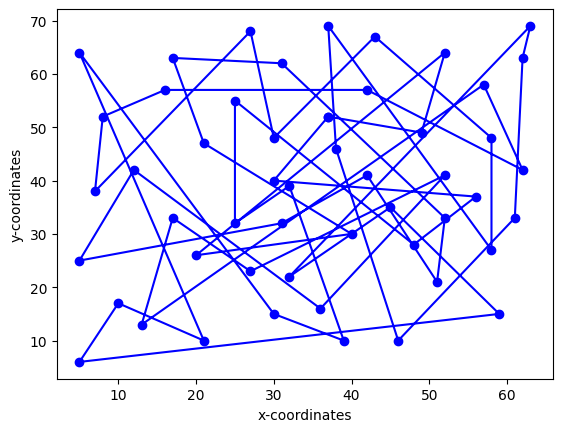

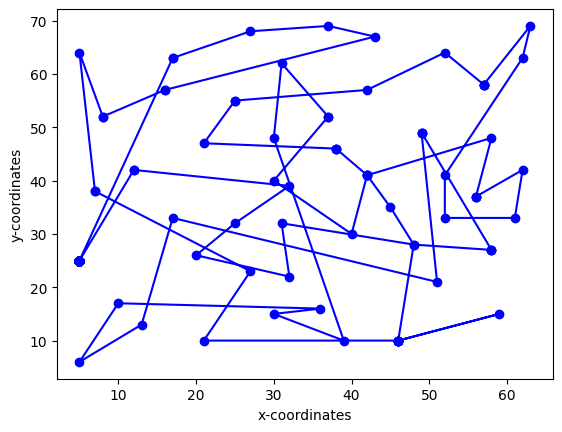

In [71]:
def ploting_route(coordinates, route):
    x = []
    y = []
    for i in route:
        x.append(coordinates[i][0])
        y.append(coordinates[i][1])

    x.append(coordinates[route[0]][0])
    y.append(coordinates[route[0]][1])

    plt.plot(x, y, 'b-o')
    plt.xlabel('x-coordinates')
    plt.ylabel('y-coordinates')

    plt.show()


ploting_route(coordinates, initial_route)



ploting_route(coordinates, optimized_route)